In [17]:
include("RK4.jl");

考虑这样一个问题：

斜抛运动中，我们向$\theta$角度的方向，以初速度$V_0$投掷一个物体，其轨迹应该是这样的：

$$
y = V_0 \sin\theta \cdot t - \frac{1}{2}g t^2\\
x = V_0 \cos\theta \cdot t
$$

那么应该这样仿真这个问题：

In [18]:
global gg = 9.8;
global theta = pi/3;
global V0 = 50.;
global t0 = 0.;
global te = 10.;
global x0 = 0.;
global y0 = 0.;

function Vy(t::Float64 , y::Any)::Float64
    y = V0 * sin(theta) - gg * t;
    return y;
end

function Vx(t::Float64 , y::Any)::Float64
    x = V0 * cos(theta);
    return x;
end

Vx (generic function with 1 method)

In [19]:
y = RK4(Vy , t0 , y0 , te)[2];
x = RK4(Vx , t0 , x0 , te)[2];

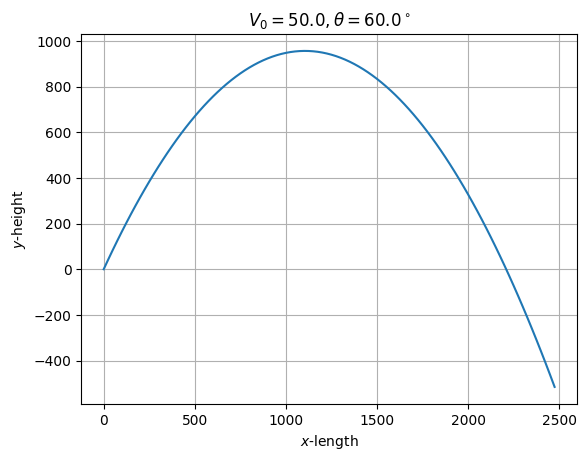

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4ebf51c040>

In [20]:
using PyPlot;
the = round(theta * 180000 / pi)/1000.;
ylabel("\$y\$-height")
xlabel("\$x\$-length")
title("\$V_0=$V0,\\theta=$the^\\circ\$")
grid("on")
plot(x , y)